In [1]:
import pandas as pd

In [2]:
train_set = pd.read_csv('data/train.csv')
songs = pd.read_csv('data/songs.csv')
members = pd.read_csv('data/members.csv')
song_extra = pd.read_csv('data/song_extra_info.csv')

Обрабатываем данные, NaN'ы заменяем на отдельный категориальный класс, используем labeling для категориальных признаков, так как для onehot encoding у нас слишком много категорий. Для жанра берем первый жанр из списка.

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

label_columns = ['composer', 'lyricist', 'artist_name', 'song_id']
songs_features = ['song_length', 'genre_ids', 'language', 'composer_label', 'lyricist_label', 'artist_name_label',
                  'song_id_label']
for column in label_columns:
    songs[column] = songs[column].fillna('nan')
    songs[column + '_label'] = le.fit_transform(songs[column])
songs['genre_ids'] = songs['genre_ids'].apply(lambda x: x if isinstance(x, float) else x.split('|')[0])
songs.head(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,composer_label,lyricist_label,artist_name_label,song_id_label
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,323118,92455,214728,523094
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0,272686,79043,16522,1867308
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,nan,nan,31.0,303035,88198,157034,572955
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0,319834,97977,156251,1483894
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0,283930,82237,219456,1223897
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,864,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0,146722,33186,219456,1734995
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,458,伍佰 & China Blue,Jonathan Lee,nan,3.0,152769,88198,212222,904544
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,465,光良 (Michael Wong),光良,彭資閔,3.0,309589,97942,212498,678241
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0,132014,85606,216167,1883520
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,352,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0,266992,77362,99986,1431908


In [4]:
label_columns = ['gender']
for column in label_columns:
    members[column] = members[column].fillna('nan')
    members[column + '_label'] = le.fit_transform(members[column])
members_features = ['city', 'bd', 'registered_via', 'registration_init_time', 'expiration_date', 'gender_label']
members.head(50)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date,gender_label
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,nan,7,20110820,20170920,2
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,nan,7,20150628,20170622,2
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,nan,4,20160411,20170712,2
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,nan,9,20150906,20150907,2
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,nan,4,20170126,20170613,2
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,female,9,20120703,20171006,0
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1,0,nan,4,20160326,20160329,2
7,pg6bT2XZkSP1TDBy4qn3HBPY/HffKQ/bg8WIISQYBSY=,1,0,nan,7,20160130,20170930,2
8,kfk1AdTNH2dNqF5LzIs4e0vwGPejw2jrnFjJlcYnEgk=,1,0,nan,7,20110111,20170930,2
9,tscijwx4dbEp0NXGl+iFtHJ8zrj+TkcMrduOQk9t+gE=,1,0,nan,7,20160217,20170613,2


In [5]:
label_columns = ['name']
for column in label_columns:
    song_extra[column] = song_extra[column].fillna('nan')
    song_extra[column + '_label'] = le.fit_transform(song_extra[column])
song_extra_features = ['name_label', 'isrc']
song_extra.head(50)

,song_id,name,isrc,name_label
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043,1085588
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015,480143
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303,1048174
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446,163109
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001,1082115
5,QU8f6JR0/cwLGSqJX2XDVzFK0DxMaIUY15ALJXK7ziw=,Our Time,GBAYE1400079,620866
6,O1Oj4CmnZhbHl7oyBaHSpGeu5gvcSmUydY3Awmv3uxk=,癢,HKUM70704066,1119234
7,Tr5R61AuEkN8UelOCzu09ZwQi7/HmP9sQmxf9rFngIg=,Aloha| E Komo Mai (Theme Song from Lilo & Stit...,USWD10423930,49891
8,ie9l12ZYXEaP4evrBBUvnNnZGdupHSX5NU+tEqB1SDg=,每天愛你多一些,HKA610200010,1105342
9,6mICNlckUVGuoK/XGC7bnxXf5s2ZnkpFHShaGL/zM2Y=,你是你的,TWI431000103,1037548


In [6]:
label_columns = ['source_system_tab', 'source_screen_name', 'source_type']
for column in label_columns:
    train_set[column] = train_set[column].fillna('nan')
    train_set[column + '_label'] = le.fit_transform(train_set[column])
train_set_features = ['source_system_tab_label', 'source_screen_name_label', 'source_type_label']
train_set.head(50)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,source_system_tab_label,source_screen_name_label,source_type_label
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,7,7
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,3,8,4
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,3,8,4
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,3,8,4
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,7,7
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1,1,7,7
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1,3,8,4
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1,1,7,7
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1,3,8,3
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1,3,8,3


In [7]:
from sklearn.model_selection import train_test_split

df, _ = train_test_split(train_set, test_size=0.6)

In [8]:
full = pd.merge(df, songs, on='song_id', how='left', copy=False)
full = pd.merge(full, members, on='msno', how='left', copy=False)
full = pd.merge(full, song_extra, on='song_id', how='left', copy=False)

In [9]:
full

,msno,song_id,source_system_tab,source_screen_name,source_type,target,source_system_tab_label,source_screen_name_label,source_type_label,song_length,...,city,bd,gender,registered_via,registration_init_time,expiration_date,gender_label,name,isrc,name_label
0,Fk6LVAzVoCi5coJ+6tgmWVKaKzbDJYSIUNh7E2DmZPw=,dRiTIgRXjPJGxUIYZc6DvTpY62q3akaGSUKx4E3QKW4=,discover,Online playlist more,online-playlist,1,0,11,7,239072.0,...,4,17,male,4,20160627,20170214,1,笑,CNZ411600060,1124926.0
1,EDtYgLwQRLNdLQ9ENKO4OQeEKXX/ZPNy8tWZXvT/hUY=,qxDl7URNa8pfCbbdoMNE0cHrU1+hMSIdyqhOGvQo69M=,search,Search,song,1,7,15,9,191904.0,...,5,19,male,3,20130616,20170910,1,電影擺渡人主題曲：讓我留在你身邊~原唱作版,TWS831700001,1153467.0
2,feaQJ9P/e04zHIiRjxpb9oqcrTrGO6Pei5iqswNAYTc=,43Qm2YzsP99P5wm37B1JIhezUcQ/1CDjYlQx6rBbz2U=,my library,Local playlist more,local-library,0,3,8,3,346272.0,...,1,0,nan,7,20160612,20170912,2,後來的我們 (Here| After| Us),TWK231610206,1073189.0
3,V74EkRG7xGO+014UwkVQH8D8P4vovIcxM9tSDHSNs0U=,pRp5FAGtohaXL6Yn6ez3SHECTOwUvCRaXQXf90pivkA=,my library,Local playlist more,local-playlist,1,3,8,4,204068.0,...,17,0,nan,7,20110518,20170930,2,Only I didn't know,KRA381001236,615368.0
4,XkORogCcAwIoTSBptOED51tv9wXQ2WCEqGgvwqKsyU0=,7NiR6bN8NjlPmeVwSJW6EJdpiSltr1bcUrO0ZWyPvPc=,discover,Discover Feature,song-based-playlist,1,0,4,10,312912.0,...,1,0,nan,4,20151116,20181014,2,Beautiful,USUM70845927,92045.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950962,Ncn1UlfGt53QY8VwyNXM8FmEAX/WLfT7zzQCVDdIWX4=,pc7j0maRrEdBHicEhqhfxPFooTagqfbhtQCQLIDIrUs=,my library,Local playlist more,local-playlist,0,3,8,4,248546.0,...,13,18,female,4,20160819,20170916,0,When I Look At You,USHR10924540,947990.0
2950963,BNSYbtaNNCYfKVig95LpQJArTEx/RN2FgivSohB8r8M=,tC0gLVG9sOx+q+p8hsBY+sHJ3TtLzmAzba3N7j4f0HE=,discover,Online playlist more,online-playlist,0,0,11,7,331337.0,...,4,37,male,9,20061115,20170920,1,玫瑰人生,TWA459443301,1116212.0
2950964,0dhVXeJDrw1k7lL4IywNwEaAqYJokiiwRw4yViE2cEM=,hiDb2qsdU+bqz7J9x03D3SyqBu2CZXU9Q1I9GKd/QNM=,discover,Artist more,top-hits-for-artist,0,0,1,11,174567.0,...,6,60,male,9,20100812,20180722,1,Adeline A Grandi(愛德琳長大了),NaN,35380.0
2950965,CbTarqYfk7DDJvNCb767f3snofwT1c5ETSkM6gWRCJ4=,gZphe9aRvr0vVO/oEt23amqyDc+YabbIJ9WIzZTVjG0=,radio,Radio,radio,1,6,14,8,225018.0,...,13,30,female,9,20100122,20170113,0,Whistle,USAT21201745,953600.0


## Графики для метрик пользователей
Хотим понять, с какими данными мы работаем, поэтому строим графики для различных метрик пользователей

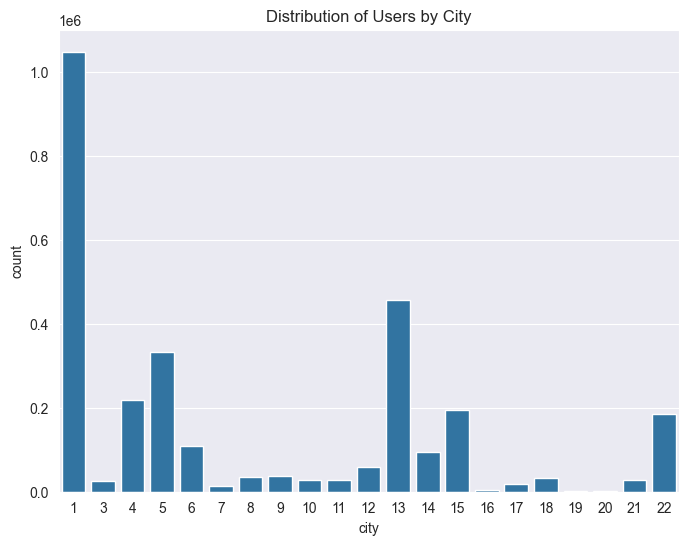

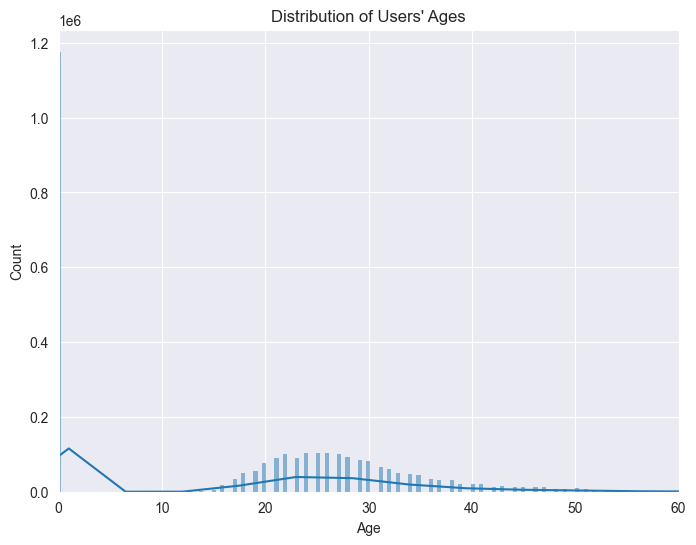

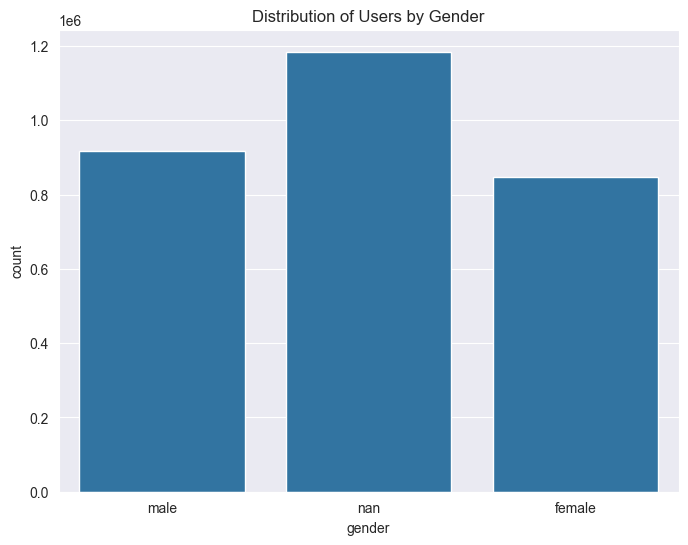

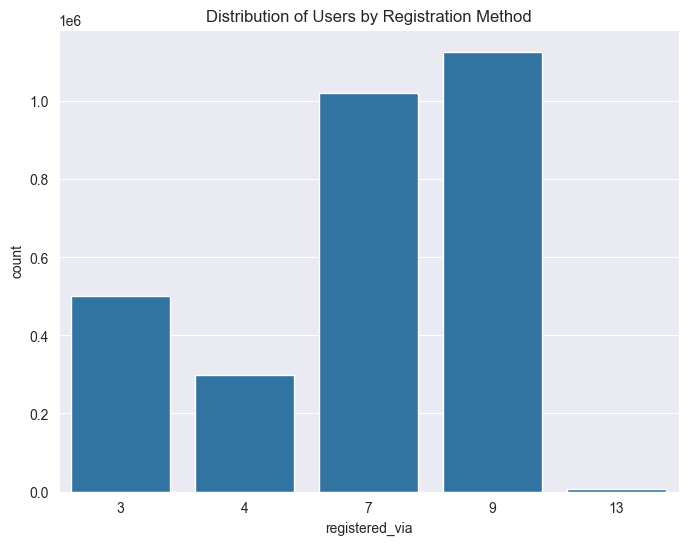

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=full, x='city')
plt.title('Distribution of Users by City')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=full, x='bd', kde=True)
plt.title('Distribution of Users\' Ages')
plt.xlabel('Age')
plt.xlim(right=60, left=0)
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=full, x='gender')
plt.title('Distribution of Users by Gender')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=full, x='registered_via')
plt.title('Distribution of Users by Registration Method')
plt.show()

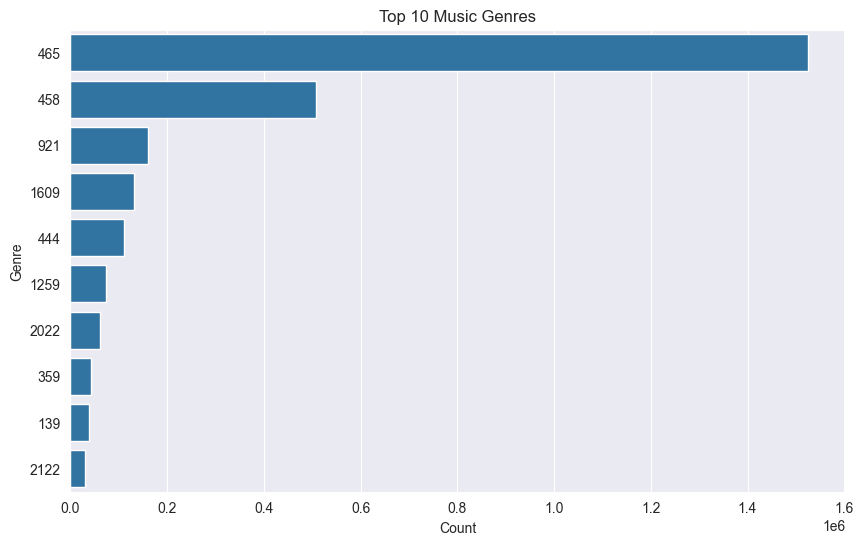

In [11]:
genre_counts = full['genre_ids'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_counts.head(10), x='count', y='genre')
plt.title('Top 10 Music Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

/Users/damircanysev/miniconda3/envs/vk_internship/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/damircanysev/miniconda3/envs/vk_internship/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26480 (\N{CJK UNIFIED IDEOGRAPH-6770}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/damircanysev/miniconda3/envs/vk_internship/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20523 (\N{CJK UNIFIED IDEOGRAPH-502B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/damircanysev/miniconda3/envs/vk_internship/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/damircanysev/miniconda3/envs/vk_internshi

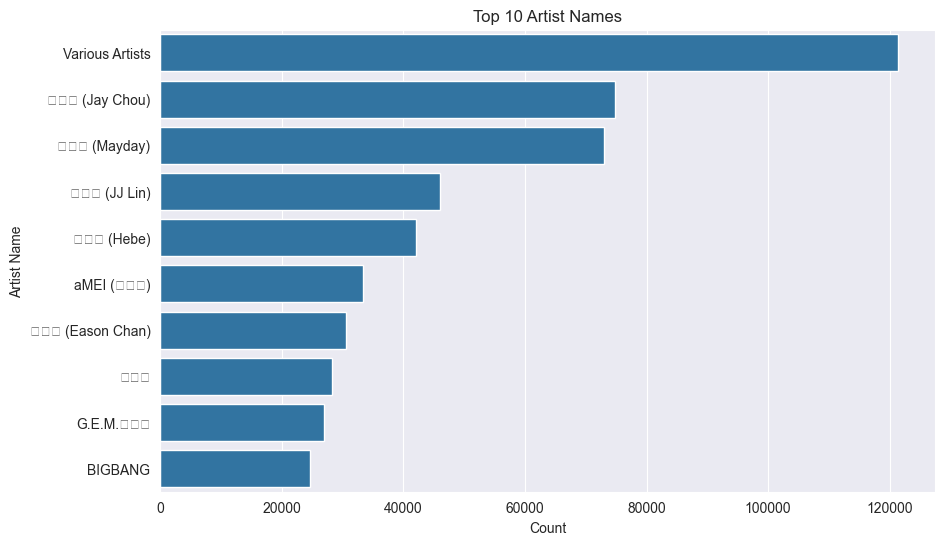

/Users/damircanysev/miniconda3/envs/vk_internship/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/damircanysev/miniconda3/envs/vk_internship/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26480 (\N{CJK UNIFIED IDEOGRAPH-6770}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/damircanysev/miniconda3/envs/vk_internship/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20523 (\N{CJK UNIFIED IDEOGRAPH-502B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/damircanysev/miniconda3/envs/vk_internship/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38463 (\N{CJK UNIFIED IDEOGRAPH-963F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/damircanysev/miniconda3/envs/vk_internshi

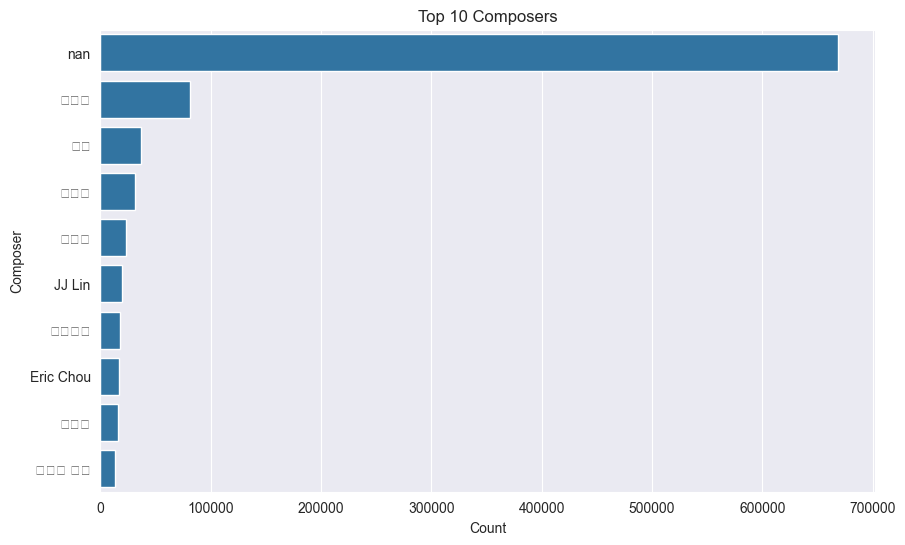

/Users/damircanysev/miniconda3/envs/vk_internship/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38463 (\N{CJK UNIFIED IDEOGRAPH-963F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/damircanysev/miniconda3/envs/vk_internship/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/damircanysev/miniconda3/envs/vk_internship/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/damircanysev/miniconda3/envs/vk_internship/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/damircanysev/miniconda3/envs/vk_internshi

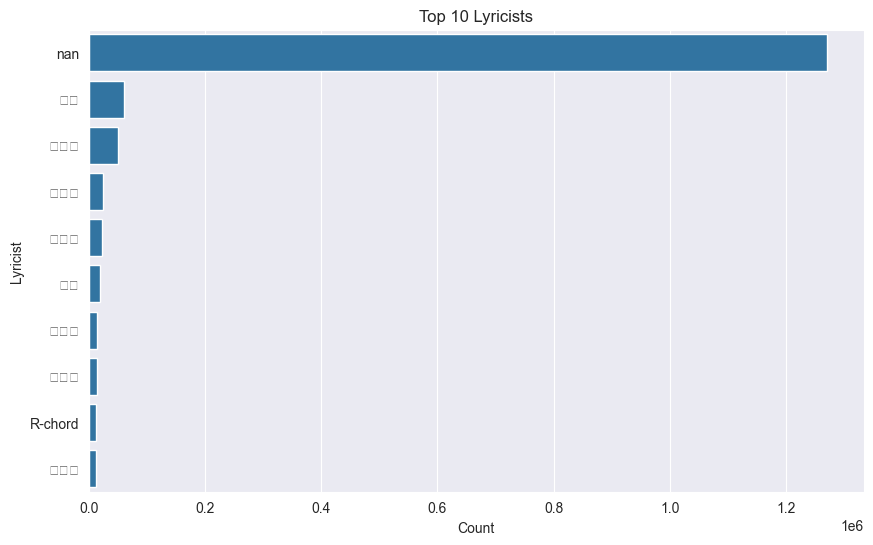

In [12]:
def plot_top_categories(df, column, top_n=10):
    counts = df[column].value_counts().reset_index().head(top_n)
    counts.columns = [column, 'count']

    plt.figure(figsize=(10, 6))
    sns.barplot(data=counts, x='count', y=column)
    plt.title(f'Top {top_n} {column.replace("_", " ").title()}s')
    plt.xlabel('Count')
    plt.ylabel(column.replace("_", " ").title())
    plt.show()


plot_top_categories(full, 'artist_name')
plot_top_categories(full, 'composer')
plot_top_categories(full, 'lyricist')

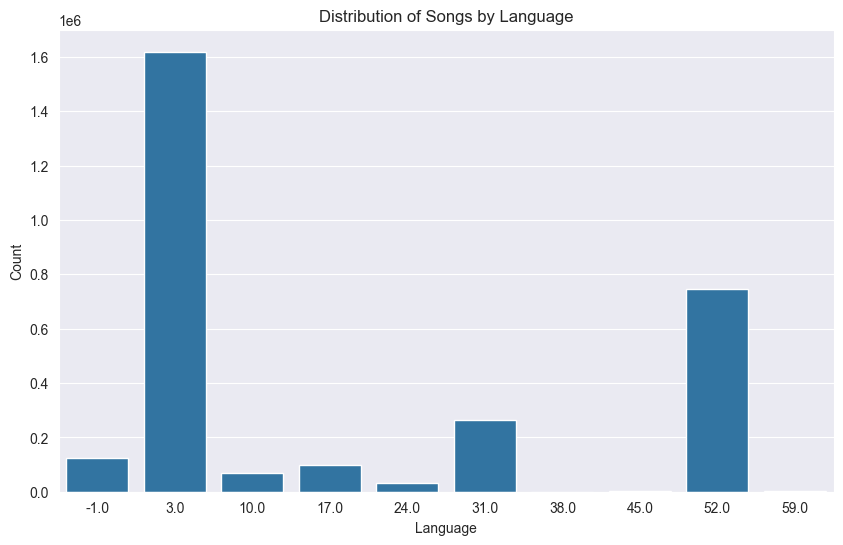

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=full, x='language')
plt.title('Distribution of Songs by Language')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

## Song features plots

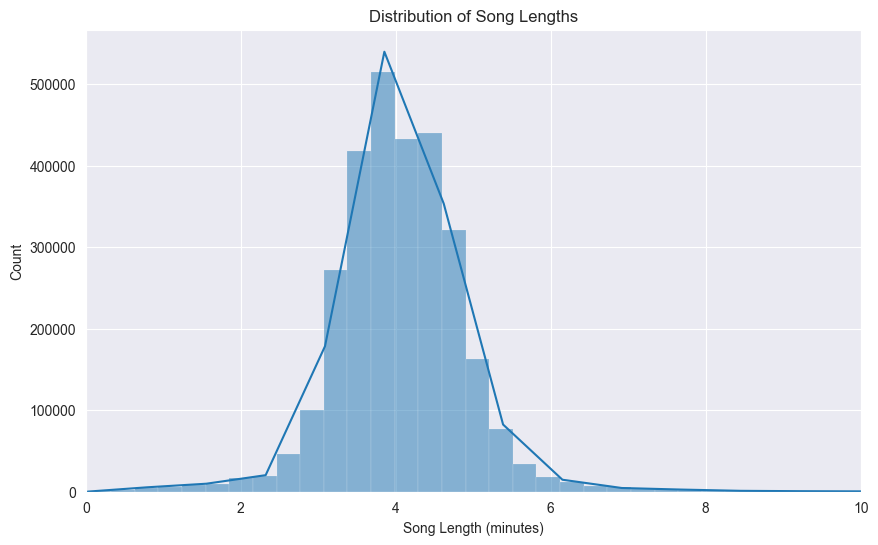

In [14]:
plt.figure(figsize=(10, 6))
full['song_length_min'] = full['song_length'] / 60000
sns.histplot(data=full, x='song_length_min', bins=500, kde=True)
plt.title('Distribution of Song Lengths')
plt.xlabel('Song Length (minutes)')
plt.xlim(left=0, right=10)
plt.show()

Считаем для определенных метрик, как часто встречаются определенные значения в истории пользователя

In [15]:
columns = ['artist_name_label', 'composer_label', 'lyricist_label', 'source_system_tab_label',
           'source_screen_name_label', 'source_type_label', 'genre_ids', 'language', 'city', 'bd', 'gender',
           'song_len_bin']

user_history_features = []
for column in columns:
    user_history_features.append(column + '_count')
    user_history_features.append(column + '_percent')


def count_history_features(df, columns):
    for column in columns:
        count_series = df.groupby(['msno', column]).size()

        count_df = count_series.reset_index(name=column + '_count')

        df = pd.merge(df, count_df, on=['msno', column], how='left')

        total_counts = df.groupby('msno')[column + '_count'].transform('sum')

        df[column + '_percent'] = df[column + '_count'] / total_counts
        df[column + '_count'] = df[column + '_count'].fillna(0)
        df[column + '_percent'] = df[column + '_percent'].fillna(0)

    return df

In [16]:
full['song_len_bin'] = pd.cut(list(full['song_length']), bins=20)
full = count_history_features(full, columns)

/var/folders/sr/bjql_fmj53v566jt_mk71z580000gn/T/ipykernel_12628/490730835.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_series = df.groupby(['msno', column]).size()


Посчитаем зависимость между метриками и target

/var/folders/sr/bjql_fmj53v566jt_mk71z580000gn/T/ipykernel_12628/3393851235.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg_target = dataframe.groupby(bins)[target_column].mean().reset_index(name='avg_target_probability')


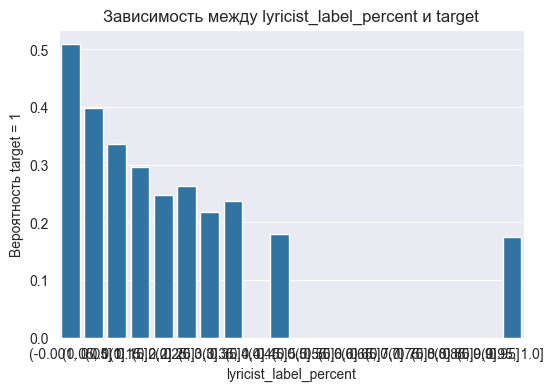

/var/folders/sr/bjql_fmj53v566jt_mk71z580000gn/T/ipykernel_12628/3393851235.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg_target = dataframe.groupby(bins)[target_column].mean().reset_index(name='avg_target_probability')


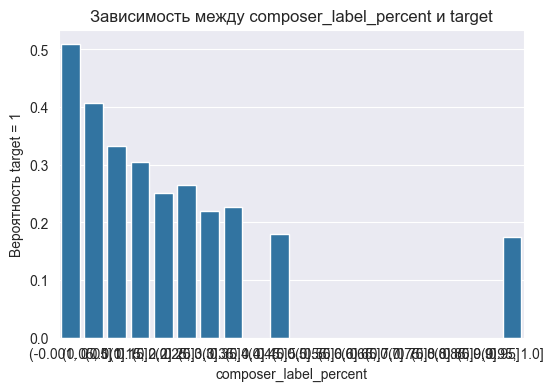

/var/folders/sr/bjql_fmj53v566jt_mk71z580000gn/T/ipykernel_12628/3393851235.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg_target = dataframe.groupby(bins)[target_column].mean().reset_index(name='avg_target_probability')


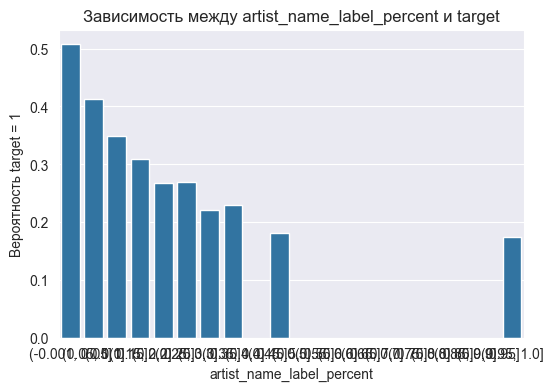

/var/folders/sr/bjql_fmj53v566jt_mk71z580000gn/T/ipykernel_12628/3393851235.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg_target = dataframe.groupby(bins)[target_column].mean().reset_index(name='avg_target_probability')


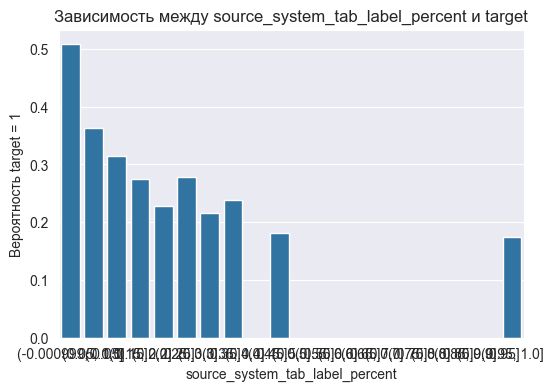

/var/folders/sr/bjql_fmj53v566jt_mk71z580000gn/T/ipykernel_12628/3393851235.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg_target = dataframe.groupby(bins)[target_column].mean().reset_index(name='avg_target_probability')


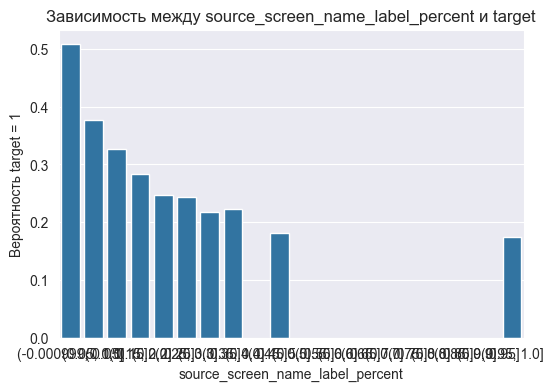

/var/folders/sr/bjql_fmj53v566jt_mk71z580000gn/T/ipykernel_12628/3393851235.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg_target = dataframe.groupby(bins)[target_column].mean().reset_index(name='avg_target_probability')


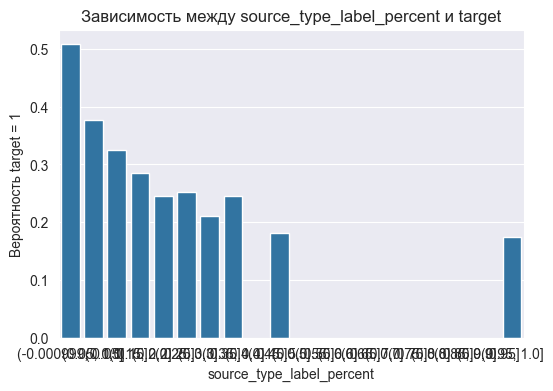

TypeError: putmask: first argument must be an array

In [17]:
def plot_binned_target_relationship(dataframe, column_name, target_column='target', bins=20, figsize=(6, 4)):
    bins = pd.cut(dataframe[column_name], bins=bins)

    binned_avg_target = dataframe.groupby(bins)[target_column].mean().reset_index(name='avg_target_probability')

    plt.figure(figsize=figsize)
    sns.barplot(x=column_name, y='avg_target_probability', data=binned_avg_target)
    plt.xlabel(f'{column_name}')
    plt.ylabel('Вероятность target = 1')
    plt.title(f'Зависимость между {column_name} и target')
    plt.show()


columns = ['lyricist_label_percent', 'composer_label_percent', 'artist_name_label_percent',
           'source_system_tab_label_percent', 'source_screen_name_label_percent', 'source_type_label_percent',
           'genre_ids', 'language']

for column in columns:
    plot_binned_target_relationship(full, column, target_column='target', bins=20)

In [18]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(full, test_size=0.2)

In [19]:
del train_set
del songs
del members
del song_extra
del full

## Обучение
Для оптимизации NDCG@20 мы должны учитывать порядок предсказаний. Поэтому мы будем оптимизировать ROC AUC модели, а затем использовать предсказания модели для ранжирования.
Сравним несколько моделей и построим из них ансамбль

In [24]:
from autogluon.tabular import TabularPredictor

features = train_set_features + songs_features + members_features + song_extra_features + user_history_features
hyperparams = {'GBM': {}, 'XGB': {}, 'RF':{}}
predictor = TabularPredictor(label='target', eval_metric='roc_auc').fit(
    train_data=train[features + ['target']],
    hyperparameters=hyperparams,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240402_195947"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240402_195947"
=================== System

[1000]	valid_set's binary_logloss: 0.600648
[2000]	valid_set's binary_logloss: 0.596948
[3000]	valid_set's binary_logloss: 0.595083
[4000]	valid_set's binary_logloss: 0.593521
[5000]	valid_set's binary_logloss: 0.5921
[6000]	valid_set's binary_logloss: 0.591627
[7000]	valid_set's binary_logloss: 0.59136
[8000]	valid_set's binary_logloss: 0.591621
[9000]	valid_set's binary_logloss: 0.591658


	0.7522	 = Validation score   (roc_auc)
	504.84s	 = Training   runtime
	3.59s	 = Validation runtime
Fitting model: RandomForest ...
	0.7785	 = Validation score   (roc_auc)
	415.97s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: XGBoost ...
	To force training the model, specify the model hyperparameter "ag.max_memory_usage_ratio" to a larger value (currently 1.0, set to >=1.23 to avoid the error)
		To set the same value for all models, do the following when calling predictor.fit: `predictor.fit(..., ag_args_fit={"ag.max_memory_usage_ratio": VALUE})`
		Setting "ag.max_memory_usage_ratio" to values above 1 may result in out-of-memory errors. You may consider using a machine with more memory as a safer alternative.
	Not enough memory to train XGBoost... Skipping this model.
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'RandomForest': 0.774, 'LightGBM': 0.226}
	0.7825	 = Validation score   (roc_auc)
	0.62s	 = Training   runtime
	0.0s	 = Validation runtime
Au

In [ ]:
predictor.evaluate(test)

In [51]:
feature_importance = predictor.feature_importance(test)

These features in provided data are not utilized by the predictor and will be ignored: ['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'artist_name', 'composer', 'lyricist', 'gender', 'name', 'song_len_bin', 'bd_count', 'bd_percent', 'gender_count', 'gender_percent', 'song_length_min', 'predicted_probability']
Computing feature importance via permutation shuffling for 38 features using 5000 rows with 5 shuffle sets...
	135.13s	= Expected runtime (27.03s per shuffle set)
	93.16s	= Actual runtime (Completed 5 of 5 shuffle sets)


In [52]:
feature_importance

,importance,stddev,p_value,n,p99_high,p99_low
source_type_label,0.064971,0.006937,1.536205e-05,5,0.079254,0.050687
source_type_label_percent,0.062702,0.007167,2.013621e-05,5,0.077459,0.047944
source_screen_name_label_count,0.048416,0.003157,2.158168e-06,5,0.054917,0.041914
genre_ids_percent,0.044105,0.010080,3.057402e-04,5,0.064858,0.023351
source_system_tab_label_percent,0.042210,0.004374,1.364208e-05,5,0.051216,0.033204
language_percent,0.041339,0.001921,5.576500e-07,5,0.045294,0.037384
source_type_label_count,0.041187,0.005955,5.102218e-05,5,0.053449,0.028925
source_screen_name_label_percent,0.038798,0.007901,1.954192e-04,5,0.055065,0.022530
language_count,0.038703,0.006916,1.173070e-04,5,0.052943,0.024463
city_count,0.038542,0.004521,2.231122e-05,5,0.047851,0.029233


In [22]:
from sklearn.metrics import ndcg_score
import numpy as np


def calculate_per_user_ndcg(df, user_id_col, true_labels_col, pred_scores_col, k=20):
    ndcg_scores = []
    for user_id, group in df.groupby(user_id_col):
        true_labels = group[true_labels_col].values
        pred_scores = group[pred_scores_col].values

        true_labels_reshaped = true_labels.reshape(1, -1)
        pred_scores_reshaped = pred_scores.reshape(1, -1)

        if len(true_labels) < k:
            continue
        ndcg = ndcg_score(true_labels_reshaped, pred_scores_reshaped, k=k)
        ndcg_scores.append(ndcg)

    return np.mean(ndcg_scores)

In [25]:
test['pred'] = predictor.predict_proba(test[features])[1]
calculate_per_user_ndcg(test, 'msno', 'target', 'pred')

0.8863423658794448

In [65]:
ttest = pd.read_csv('data/test.csv')

In [66]:
full_test = pd.merge(ttest, songs, on='song_id', how='left')
full_test = pd.merge(full_test, members, on='msno', how='left')
full_test = pd.merge(full_test, song_extra, on='song_id', how='left')

In [69]:
full_test['song_len_bin'] = pd.cut(list(full_test['song_length']), bins=20)

In [70]:
label_columns = ['source_system_tab', 'source_screen_name', 'source_type']
for column in label_columns:
    full_test[column] = full_test[column].fillna('nan')
    full_test[column + '_label'] = le.fit_transform(full_test[column])
columns = ['artist_name_label', 'composer_label', 'lyricist_label', 'source_system_tab_label',
           'source_screen_name_label', 'source_type_label', 'genre_ids', 'language', 'city', 'bd', 'gender',
           'song_len_bin']
full_test = count_history_features(full_test, columns)

/var/folders/sr/bjql_fmj53v566jt_mk71z580000gn/T/ipykernel_10375/490730835.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_series = df.groupby(['msno', column]).size()


In [80]:
full_test['target'] = predictor.predict_proba(full_test[features])[1]

In [85]:
ttest['target']

0          0.686949
1          0.749570
2          0.093374
3          0.365366
4          0.142407
             ...   
2556785    0.303832
2556786    0.542276
2556787    0.677941
2556788    0.290253
2556789    0.507165
Name: target, Length: 2556790, dtype: float64

In [86]:
submission = ttest[['id', 'target']]
submission.to_csv('submission.csv', index=False)